In [48]:
# Load libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO

In [49]:
students = pd.read_csv("students_sim.csv")

students.head()

,borough,age,gpa,days_missed,major,full_time,freshman,first_generation,employed,pell_grant,grade
0,Queens,23.506713,2.750114,4.112559,Computer Science,1,1,1,1,1,P
1,Bronx,32.359542,2.628738,9.125405,Computer Information Systems,1,1,0,1,0,P
2,Queens,27.952806,3.496827,-2.460233,Computer Information Systems,1,1,0,0,1,P
3,Outside NYC,25.437261,2.641960,3.628984,Computer Information Systems,1,0,0,1,0,P
4,Bronx,23.918368,3.121163,5.531502,Computer Information Systems,1,1,0,0,0,P


In [50]:
# recode DWFI as 0, P as 1
students["outcome"] = students.grade.apply(lambda x: int(x == "DWFI"))

# create dummy variables (0, 1) for borough and major
students_full = pd.get_dummies(students, columns=["borough", "major"], drop_first=True)
# students_full.columns

#split dataset in features and target variable
feature_cols = ['age', 'gpa', 'full_time', 'freshman', 'first_generation', 'employed',
       'pell_grant', 'borough_Brooklyn', 'borough_Manhattan',
       'borough_Outside NYC', 'borough_Queens', 'borough_Staten Island',
       'major_Computer Science']

X = students_full[feature_cols] # Features
y = students_full.outcome # Target variable

# Use train_test_split to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=15) # 70% training and 30% test

In [51]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
print(c_matrix)

Accuracy: 0.67
Precision: 0.769
Recall: 0.667
[[2627 1266]
 [2098 4209]]


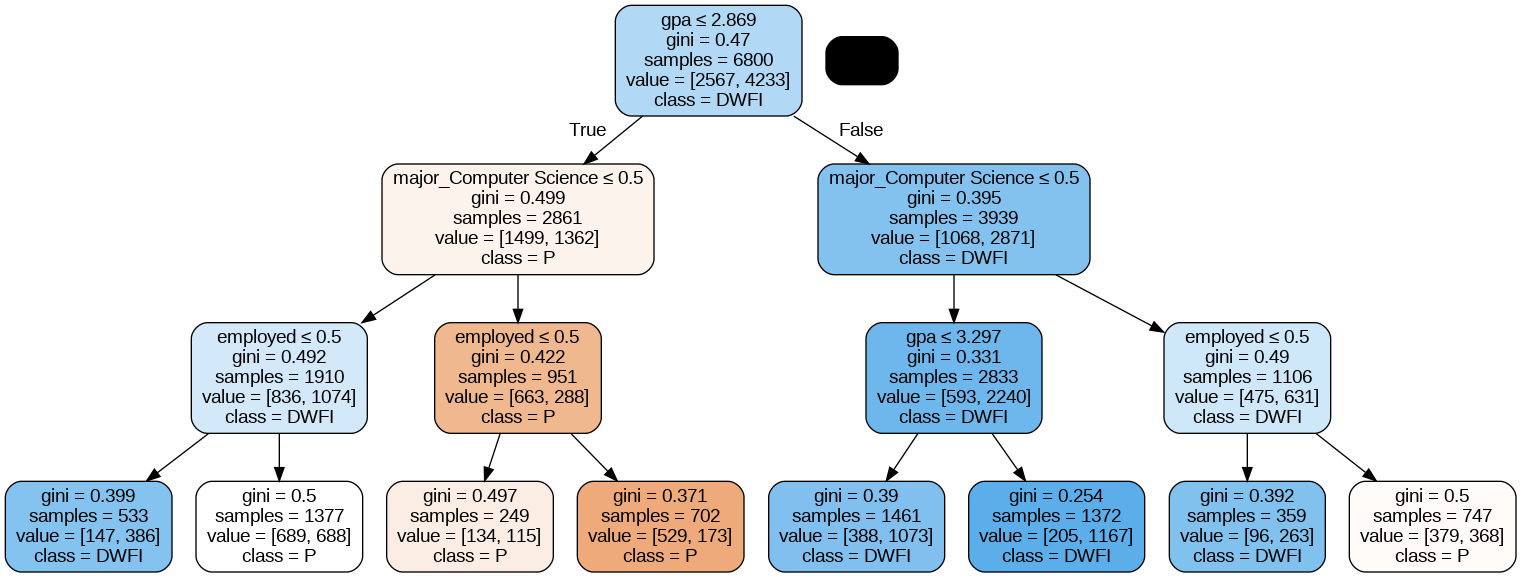

In [52]:
# graph decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['P','DWFI'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('students.png')
Image(graph.create_png())

In [53]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf = RandomForestClassifier(criterion="gini", max_depth=3, n_estimators=100)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
print(c_matrix)

Accuracy: 0.679
Precision: 0.673
Recall: 0.935
[[1032 2861]
 [ 413 5894]]


In [54]:
### GRADIENT BOOSTING

# Create Decision Tree classifer object
clf_gb = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.05)

# Train Decision Tree Classifer
clf_gb = clf_gb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb = clf_gb.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gb).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb).round(3))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)

Accuracy: 0.709
Precision: 0.728
Recall: 0.845
[[1904 1989]
 [ 979 5328]]


In [47]:
### Compare AUC

## NOTE: You need predicted probabilities to do this - not predicted classes

print(f"Decision tree: {round(metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), 4)}")
print(f"Random forest: {round(metrics.roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1]), 4)}")
print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")


Decision tree: 0.7503
Random forest: 0.7488
Gradient boosting: 0.7564


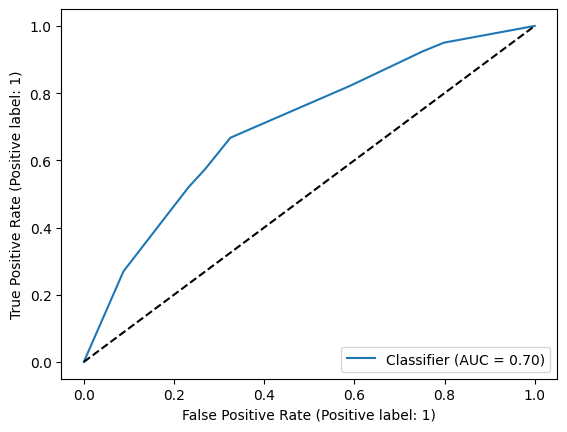

In [57]:
# Plot the ROC curve
display = metrics.RocCurveDisplay.from_predictions(
    y_true=y_test,
    y_pred=clf.predict_proba(X_test)[:,1]
)

# plot the dashed line to show a random model (BAD, as if coin flip)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')